# K-means
https://scikit-learn.org/stable/
<img src="https://mofanpy.com/static/results/sklearn/2_1_1.png">

## K-means是一種分群方法，為非監督式學習

### 1. 設定n群
### 2. K-means隨機給予n個群心
### 3. 每個點用距離公式計算並分類給最近的群
### 4. 用每一群的點重新計算群心
### 5. 重複3、4步驟直到收斂

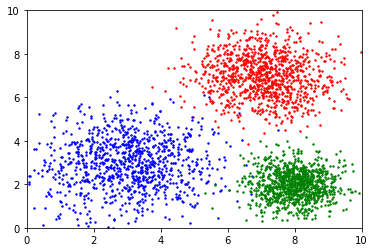

In [1]:
%matplotlib inline

import random
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

feature = np.array([2, 2])
for i in range(3000):
    if i%3 == 0:
        x = 3 + random.normalvariate(0, 1.2)
        y = 3 + random.normalvariate(0, 1.2)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='b', s=2)
    elif i%3 == 1:
        x = 7 + random.normalvariate(0, 1)
        y = 7 + random.normalvariate(0, 1)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='r', s=2)
    else:
        x = 8 + random.normalvariate(0, 0.7)
        y = 2 + random.normalvariate(0, 0.7)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='g', s=2)
feature = feature[1:]

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [2]:
feature

array([[0.45076443, 2.66839085],
       [5.54723009, 5.7725298 ],
       [7.48509742, 2.62960601],
       ...,
       [0.33848153, 2.52595631],
       [8.49119027, 6.84627773],
       [7.67437301, 2.10780072]])

### K-means官方文件
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

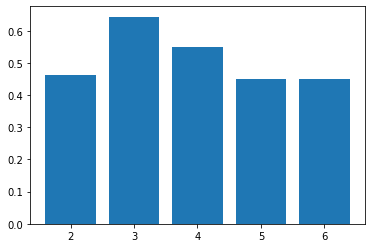

[0.4633493847382386, 0.643357413074144, 0.5482847659706673, 0.44955217821980226, 0.4511376391853383]


In [3]:
# 迴圈
silhouette_avgs = []
ks = range(2, 7)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(feature)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(feature, cluster_labels) # -1 ~ 1
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [4]:
print(cluster_labels)

[3 2 0 ... 3 5 0]


In [5]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0DGtyMBOZ-c" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
# 出處: https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# KNN(k nearest neighbors)
## KNN可以做分類或回歸，為監督式學習
### 1. 設定k值
### 2. 計算距離公式找出k個最相近的特徵
### 3. 分類: k個特徵投票、回歸: 平均k個特徵
<img src="https://ww2.mathworks.cn/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif">

### 蒐集資料
python MLGame.py -i ml_play_template.py -f 200 -r arkanoid NORMAL 3

In [1]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

#試取資料
file = open("./log/ (1).pickle", "rb")
data = pickle.load(file)
file.close()
type(data['ml'])

dict

In [2]:
game_info = data['ml']['scene_info']
game_command = data['ml']['command']
print(game_info)
print(game_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (100, 388), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (107, 381), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (114, 374), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (121, 367), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 6, 'sta

In [4]:
for i in range(2, 19):
    path = "./log/ (" + str(i) + ").pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
    
print(len(game_info))
print(len(game_command))

49945
49945


### 特徵整理

In [5]:
g = game_info[1]

feature = np.array([g['ball'][0], g['ball'][1], g['platform'][0]])
print(feature)

print(game_command[1])
game_command[1] = 0

[ 93 395  75]
NONE


In [6]:
for i in range(2, len(game_info) - 1):
    g = game_info[i]
    feature = np.vstack((feature, [g['ball'][0], g['ball'][1], g['platform'][0]]))
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2
    
answer = np.array(game_command[1:-1])

print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 93 395  75]
 [100 388  75]
 [107 381  75]
 ...
 [120  35  65]
 [130  42  60]
 [140  49  55]]
(49943, 3)
[0 0 0 ... 1 1 2]
(49943,)


### KNN官方文件
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
### 交叉驗證
https://chih-sheng-huang821.medium.com/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89-cross-validation-cv-3b2c714b18db

In [7]:
#資料劃分
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
#參數區間
param_grid = {'n_neighbors':[1, 2, 3]}
#交叉驗證 
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=6) #n_jobs為平行運算的數量
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

#儲存
file = open('arkanoid_n3_20210309_knn_model.pickle', 'wb')
pickle.dump(grid, file)
file.close()

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    2.3s remaining:    4.7s
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:    2.3s remaining:    1.1s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    2.3s finished


### f1-score
https://medium.com/nlp-tsupei/precision-recall-f1-score%E7%B0%A1%E5%96%AE%E4%BB%8B%E7%B4%B9-f87baa82a47

In [8]:
#最佳參數
print(grid.best_params_)
#預測結果
#print(grid_predictions)
#混淆矩陣
print(confusion_matrix(y_test, grid_predictions))
#分類結果
print(classification_report(y_test, grid_predictions))

{'n_neighbors': 1}
[[3868  309  309]
 [ 284 4839  181]
 [ 308  259 4626]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4486
           1       0.89      0.91      0.90      5304
           2       0.90      0.89      0.90      5193

    accuracy                           0.89     14983
   macro avg       0.89      0.89      0.89     14983
weighted avg       0.89      0.89      0.89     14983



### 執行遊戲
python MLGame.py -i knn.py -f 50 arkanoid NORMAL 3